<a href="https://colab.research.google.com/github/julianovale/PO450/blob/main/Semana07_PO450_Atividade05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Juliano Cesar Rodrigues Vale - Atividade 5

# RA: 265750

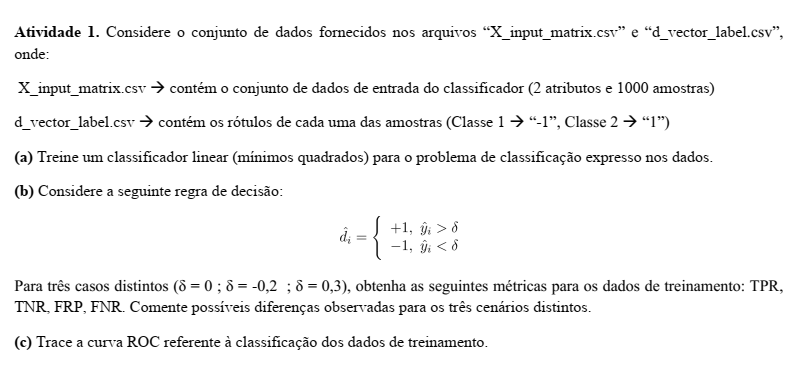

In [28]:
# importando bibliotecas

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, ConfusionMatrixDisplay

In [29]:
# leitura dos dados

X_url = 'https://raw.githubusercontent.com/julianovale/PO450/main/semana07/X_input_matrix.csv'
d_url = 'https://raw.githubusercontent.com/julianovale/PO450/main/semana07/d_vector_label.csv'
x = np.loadtxt(X_url, delimiter=',')
d = np.loadtxt(d_url, delimiter=',')
dfx = pd.DataFrame(x, columns=['Var01','Var02'])
dfd = pd.DataFrame(d, columns=['d'])
df = pd.concat([dfx, dfd], axis=1)
df.head()

,Var01,Var02,d
0,9.048768,8.506883,1.0
1,4.403171,4.467171,1.0
2,0.885328,9.306700,-1.0
3,4.598181,7.436493,1.0
4,1.367086,8.623110,1.0


## Item (a)

In [30]:
# splitando treinamento e teste
prop_test = 0.3
X_train, X_test, d_train, d_test = train_test_split(df[['Var01','Var02']], df['d'], test_size = prop_test)

In [31]:
# criando instância e ajustando o modelo
model_reg_linear = LinearRegression()
model_reg_linear.fit(X_train, d_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Item (b) ($\delta$ = 0)

In [32]:
# predizendo e calculando acurácia

delta = 0

y_hat_train = model_reg_linear.predict(X_train)
d_hat_train = np.where((y_hat_train >= delta), 1, -1)
print('************* Relatório do treinamento **************')
print(classification_report(d_train, d_hat_train))
print()

y_hat_test = model_reg_linear.predict(X_test)
d_hat_test = np.where((y_hat_test >= delta), 1, -1)
print('*************** Relatório do teste ******************')
print(classification_report(d_test, d_hat_test))

************* Relatório do treinamento **************
              precision    recall  f1-score   support

        -1.0       0.89      0.88      0.89       353
         1.0       0.88      0.89      0.89       347

    accuracy                           0.89       700
   macro avg       0.89      0.89      0.89       700
weighted avg       0.89      0.89      0.89       700


*************** Relatório do teste ******************
              precision    recall  f1-score   support

        -1.0       0.88      0.89      0.89       147
         1.0       0.89      0.88      0.89       153

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



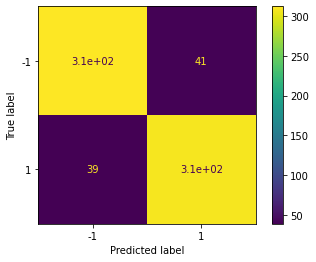

In [33]:
Conf_Matrix = confusion_matrix(d_train, d_hat_train)
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix,display_labels=(-1,1))
disp.plot();

In [34]:
TN = Conf_Matrix[0][0]
FP = Conf_Matrix[0][1]
FN = Conf_Matrix[1][0]
TP = Conf_Matrix[1][1]
P = FN+TP
N = TN+FP
TPR = TP/P
TNR = TN/N
FPR = FP/N
FNR = FN/P

print('****** Relatório de métricas ******')
print('TPR = ', TPR)
print('TNP = ', TNR)
print('FPR = ', FPR)
print('FNR = ', FNR)

****** Relatório de métricas ******
TPR =  0.8876080691642652
TNP =  0.8838526912181303
FPR =  0.11614730878186968
FNR =  0.11239193083573487


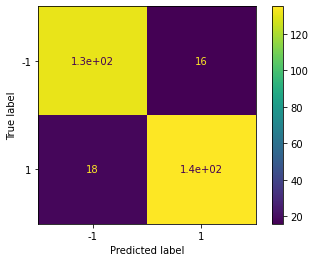

In [35]:
Conf_Matrix = confusion_matrix(d_test, d_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix,display_labels=(-1,1))
disp.plot();

In [36]:
TN = Conf_Matrix[0][0]
FP = Conf_Matrix[0][1]
FN = Conf_Matrix[1][0]
TP = Conf_Matrix[1][1]
P = FN+TP
N = TN+FP
TPR = TP/P
TNR = TN/N
FPR = FP/N
FNR = FN/P

print('****** Relatório de métricas ******')
print('TPR = ', TPR)
print('TNP = ', TNR)
print('FPR = ', FPR)
print('FNR = ', FNR)

****** Relatório de métricas ******
TPR =  0.8823529411764706
TNP =  0.891156462585034
FPR =  0.10884353741496598
FNR =  0.11764705882352941


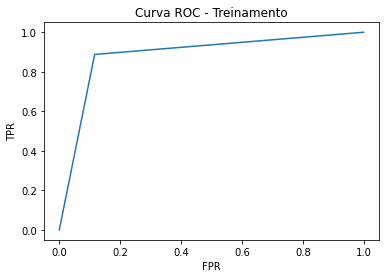

In [37]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(d_train, d_hat_train)

plt.plot(fpr, tpr)
plt.title("Curva ROC - Treinamento")
plt.xlabel("FPR")
plt.ylabel("TPR");

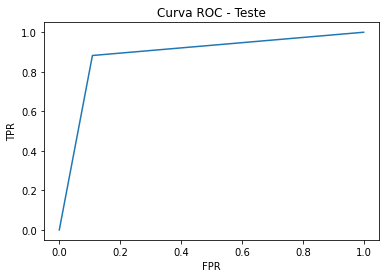

In [38]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(d_test, d_hat_test)

plt.plot(fpr, tpr)
plt.title("Curva ROC - Teste")
plt.xlabel("FPR")
plt.ylabel("TPR");

## Item (b) ($\delta$ = -0.2)

In [39]:
# predizendo e calculando acurácia

delta = -0.2

y_hat_train = model_reg_linear.predict(X_train)
d_hat_train = np.where((y_hat_train >= delta), 1, -1)
print('************* Relatório do treinamento **************')
print(classification_report(d_train, d_hat_train))
print()

y_hat_test = model_reg_linear.predict(X_test)
d_hat_test = np.where((y_hat_test >= delta), 1, -1)
print('*************** Relatório do teste ******************')
print(classification_report(d_test, d_hat_test))

************* Relatório do treinamento **************
              precision    recall  f1-score   support

        -1.0       0.96      0.78      0.86       353
         1.0       0.81      0.96      0.88       347

    accuracy                           0.87       700
   macro avg       0.88      0.87      0.87       700
weighted avg       0.89      0.87      0.87       700


*************** Relatório do teste ******************
              precision    recall  f1-score   support

        -1.0       0.94      0.80      0.86       147
         1.0       0.83      0.95      0.88       153

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300



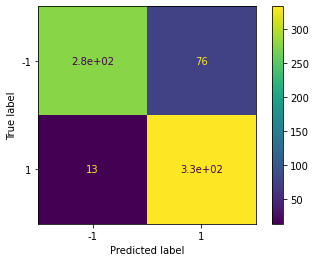

In [40]:
Conf_Matrix = confusion_matrix(d_train, d_hat_train)
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix,display_labels=(-1,1))
disp.plot();

In [41]:
TN = Conf_Matrix[0][0]
FP = Conf_Matrix[0][1]
FN = Conf_Matrix[1][0]
TP = Conf_Matrix[1][1]
P = FN+TP
N = TN+FP
TPR = TP/P
TNR = TN/N
FPR = FP/N
FNR = FN/P

print('****** Relatório de métricas ******')
print('TPR = ', TPR)
print('TNP = ', TNR)
print('FPR = ', FPR)
print('FNR = ', FNR)

****** Relatório de métricas ******
TPR =  0.962536023054755
TNP =  0.7847025495750708
FPR =  0.21529745042492918
FNR =  0.037463976945244955


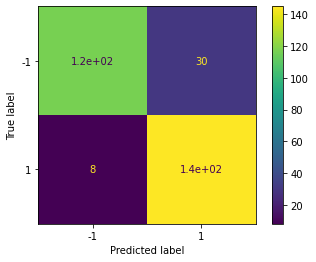

In [42]:
Conf_Matrix = confusion_matrix(d_test, d_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix,display_labels=(-1,1))
disp.plot();

In [43]:
TN = Conf_Matrix[0][0]
FP = Conf_Matrix[0][1]
FN = Conf_Matrix[1][0]
TP = Conf_Matrix[1][1]
P = FN+TP
N = TN+FP
TPR = TP/P
TNR = TN/N
FPR = FP/N
FNR = FN/P

print('****** Relatório de métricas ******')
print('TPR = ', TPR)
print('TNP = ', TNR)
print('FPR = ', FPR)
print('FNR = ', FNR)

****** Relatório de métricas ******
TPR =  0.9477124183006536
TNP =  0.7959183673469388
FPR =  0.20408163265306123
FNR =  0.05228758169934641


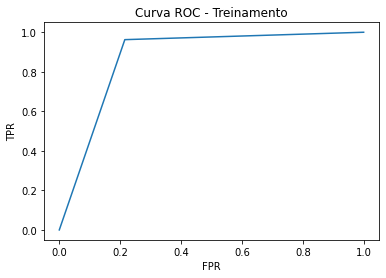

In [44]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(d_train, d_hat_train)

plt.plot(fpr, tpr)
plt.title("Curva ROC - Treinamento")
plt.xlabel("FPR")
plt.ylabel("TPR");

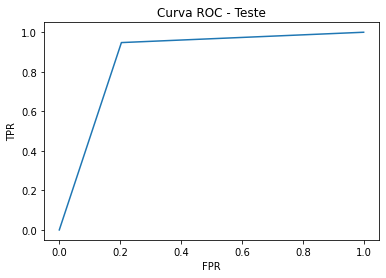

In [45]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(d_test, d_hat_test)

plt.plot(fpr, tpr)
plt.title("Curva ROC - Teste")
plt.xlabel("FPR")
plt.ylabel("TPR");

## Item (b) ($\delta$ = 0.3)

In [46]:
# predizendo e calculando acurácia

delta = 0.3

y_hat_train = model_reg_linear.predict(X_train)
d_hat_train = np.where((y_hat_train >= delta), 1, -1)
print('************* Relatório do treinamento **************')
print(classification_report(d_train, d_hat_train))
print()

y_hat_test = model_reg_linear.predict(X_test)
d_hat_test = np.where((y_hat_test >= delta), 1, -1)
print('*************** Relatório do teste ******************')
print(classification_report(d_test, d_hat_test))

************* Relatório do treinamento **************
              precision    recall  f1-score   support

        -1.0       0.78      0.96      0.86       353
         1.0       0.95      0.72      0.82       347

    accuracy                           0.84       700
   macro avg       0.86      0.84      0.84       700
weighted avg       0.86      0.84      0.84       700


*************** Relatório do teste ******************
              precision    recall  f1-score   support

        -1.0       0.75      0.94      0.83       147
         1.0       0.92      0.69      0.79       153

    accuracy                           0.81       300
   macro avg       0.83      0.82      0.81       300
weighted avg       0.84      0.81      0.81       300



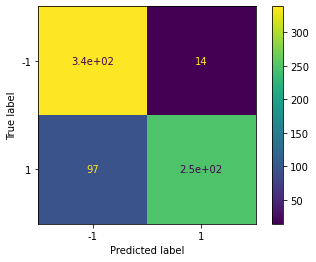

In [47]:
Conf_Matrix = confusion_matrix(d_train, d_hat_train)
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix,display_labels=(-1,1))
disp.plot();

In [48]:
TN = Conf_Matrix[0][0]
FP = Conf_Matrix[0][1]
FN = Conf_Matrix[1][0]
TP = Conf_Matrix[1][1]
P = FN+TP
N = TN+FP
TPR = TP/P
TNR = TN/N
FPR = FP/N
FNR = FN/P

print('****** Relatório de métricas ******')
print('TPR = ', TPR)
print('TNP = ', TNR)
print('FPR = ', FPR)
print('FNR = ', FNR)

****** Relatório de métricas ******
TPR =  0.7204610951008645
TNP =  0.9603399433427762
FPR =  0.039660056657223795
FNR =  0.27953890489913547


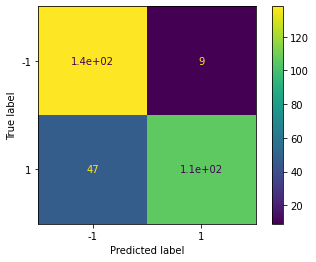

In [49]:
Conf_Matrix = confusion_matrix(d_test, d_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix,display_labels=(-1,1))
disp.plot();

In [50]:
TN = Conf_Matrix[0][0]
FP = Conf_Matrix[0][1]
FN = Conf_Matrix[1][0]
TP = Conf_Matrix[1][1]
P = FN+TP
N = TN+FP
TPR = TP/P
TNR = TN/N
FPR = FP/N
FNR = FN/P

print('****** Relatório de métricas ******')
print('TPR = ', TPR)
print('TNP = ', TNR)
print('FPR = ', FPR)
print('FNR = ', FNR)

****** Relatório de métricas ******
TPR =  0.6928104575163399
TNP =  0.9387755102040817
FPR =  0.061224489795918366
FNR =  0.30718954248366015


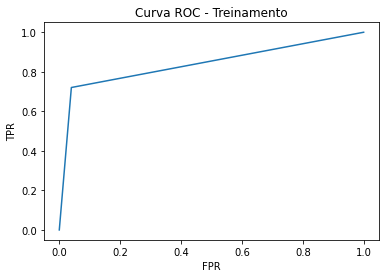

In [51]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(d_train, d_hat_train)

plt.plot(fpr, tpr)
plt.title("Curva ROC - Treinamento")
plt.xlabel("FPR")
plt.ylabel("TPR");

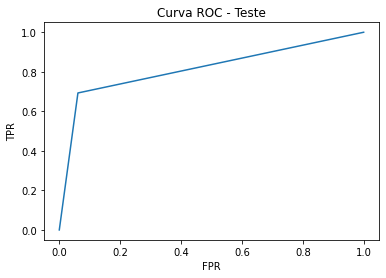

In [52]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(d_test, d_hat_test)

plt.plot(fpr, tpr)
plt.title("Curva ROC - Teste")
plt.xlabel("FPR")
plt.ylabel("TPR");